# **Objective - 2**

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from collections import OrderedDict 
import math
import numpy as np
import io 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
data=pd.read_csv('2 EG_FEC_RNEW.csv',index_col='S.No.')
data

,GeoAreaName,2001,2017
S.No.,,,
1,Afghanistan,54.06,24.65
2,Albania,39.13,37.19
3,Algeria,0.43,0.14
4,American Samoa,0.00,1.75
5,Americas,11.11,16.47
...,...,...,...
230,Viet Nam,56.35,31.98
231,Wallis and Futuna Islands,1.23,0.67
232,Yemen,1.07,4.85


In [54]:
#for calculating mean
def cal_mean(data,column):
  column=str(column)
  count=len(data[column])
  sum=0
  for index,row in data.iterrows():
      sum=sum+row[column]
  u=round(sum/count,2)
  return u
#for calculating standard deviation
def cal_dev(data,column):
  sum=0
  column=str(column)
  count=len(data[column])
  for index,row in data.iterrows():
      diff=round((row[column]-cal_mean(data,column))**2,2)
      sum=sum+diff
  sd=round(math.sqrt(sum/count),2)
  return sd

# **For 2001**

In [55]:
mean_1=cal_mean(data,2001)
dev_1=cal_dev(data,2001)
print('Mean: ',mean_1)
print('Standard Deviation: ',dev_1)

Mean:  28.8
Standard Deviation:  30.65


# **For 2017**

In [56]:
mean_2=cal_mean(data,2017)
dev_2=cal_dev(data,2017)
print('Mean: ',mean_2)
print('Standard Deviation: ',dev_2)

Mean:  26.94
Standard Deviation:  26.96


**Forming Hypothesis**\
It is claimed by UN that the Contribution of Renewable Energy in Total Energy is Increased\
Null Hypothesis:\
  p1-p2≤0\
Alternate Hypothesis:\
  p1-p2>0\
Left Tail

In [57]:
p1=(mean_1)/100
p2=(mean_2)/100
n1=len(data['2001'])
n2=len(data['2017'])

In [58]:
def z_test_propdiff(p1,p2,n1,n2):
  p1=float(p1)
  p2=float(p2)
  n1=float(n1)
  n2=float(n2)
  p=(p1*n1 + p2*n2)/(n1+n2)
  q=1-p1
  a=p1-p2
  c=p*q
  b=(p*q*((1/n1)+(1/n2)))**(1/2)
  z=a/b
  if z<1.645:
    print("Null Hypothesis Accepted")
  else:
    print("Null Hypothesis Rejected")
  return z
  

In [59]:
z_test_propdiff(p1,p2,n1,n2)

Null Hypothesis Accepted


0.4516451947199482

# **Graphs For Year 2001**

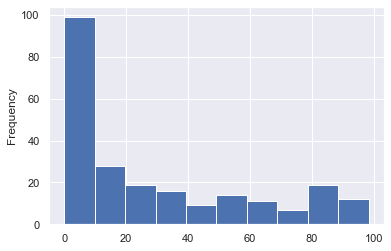

In [60]:
data['2001'].plot.hist(bins=10)

In [61]:
el=data.loc[(data['2001']<5)&(data['2001']>0)].drop(columns=['2017'])
ell=data.loc[(data['2001']<10)&(data['2001']>=5)].drop(columns=['2017'])
el1=data.loc[(data['2001']>=10)&(data['2001']<20)].drop(columns=['2017'])
el2=data.loc[(data['2001']>=20)&(data['2001']<40)].drop(columns=['2017'])
el3=data.loc[(data['2001']>=40)&(data['2001']<60)].drop(columns=['2017'])
el4=data.loc[(data['2001']>=60)&(data['2001']<80)].drop(columns=['2017'])
el5=data.loc[(data['2001']>=80)&(data['2001']<90)].drop(columns=['2017'])
el6=data.loc[(data['2001']>=90)&(data['2001']<100)].drop(columns=['2017'])

Text(0, 0.5, 'Countries')

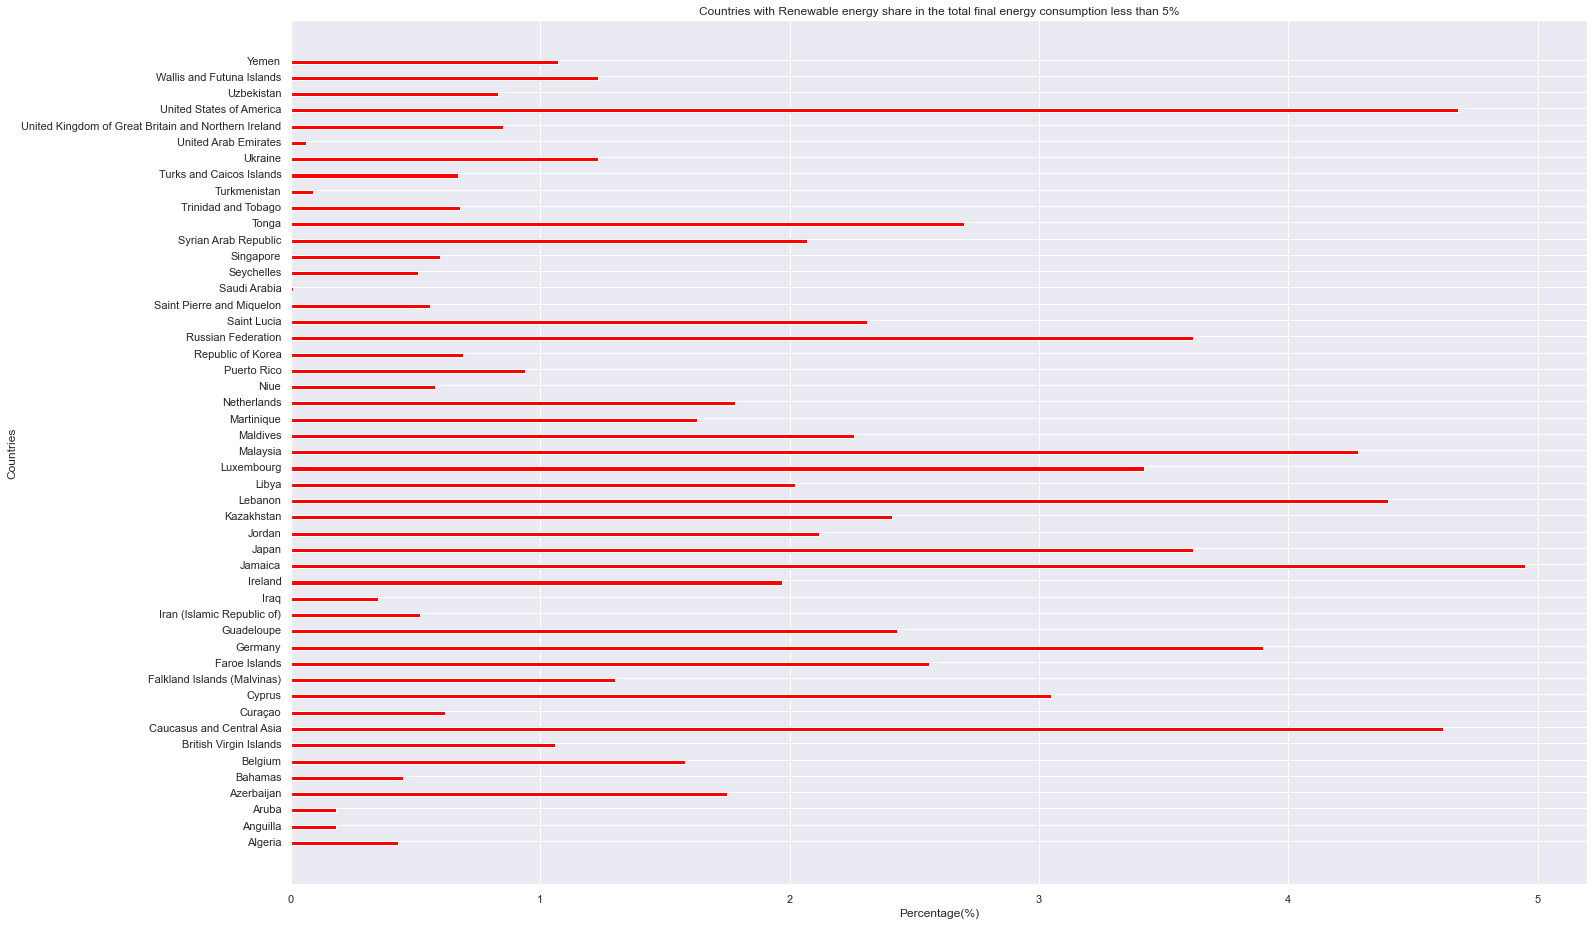

In [62]:
x = el['GeoAreaName']
y = el['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption less than 5%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()


Text(0, 0.5, 'Countries')

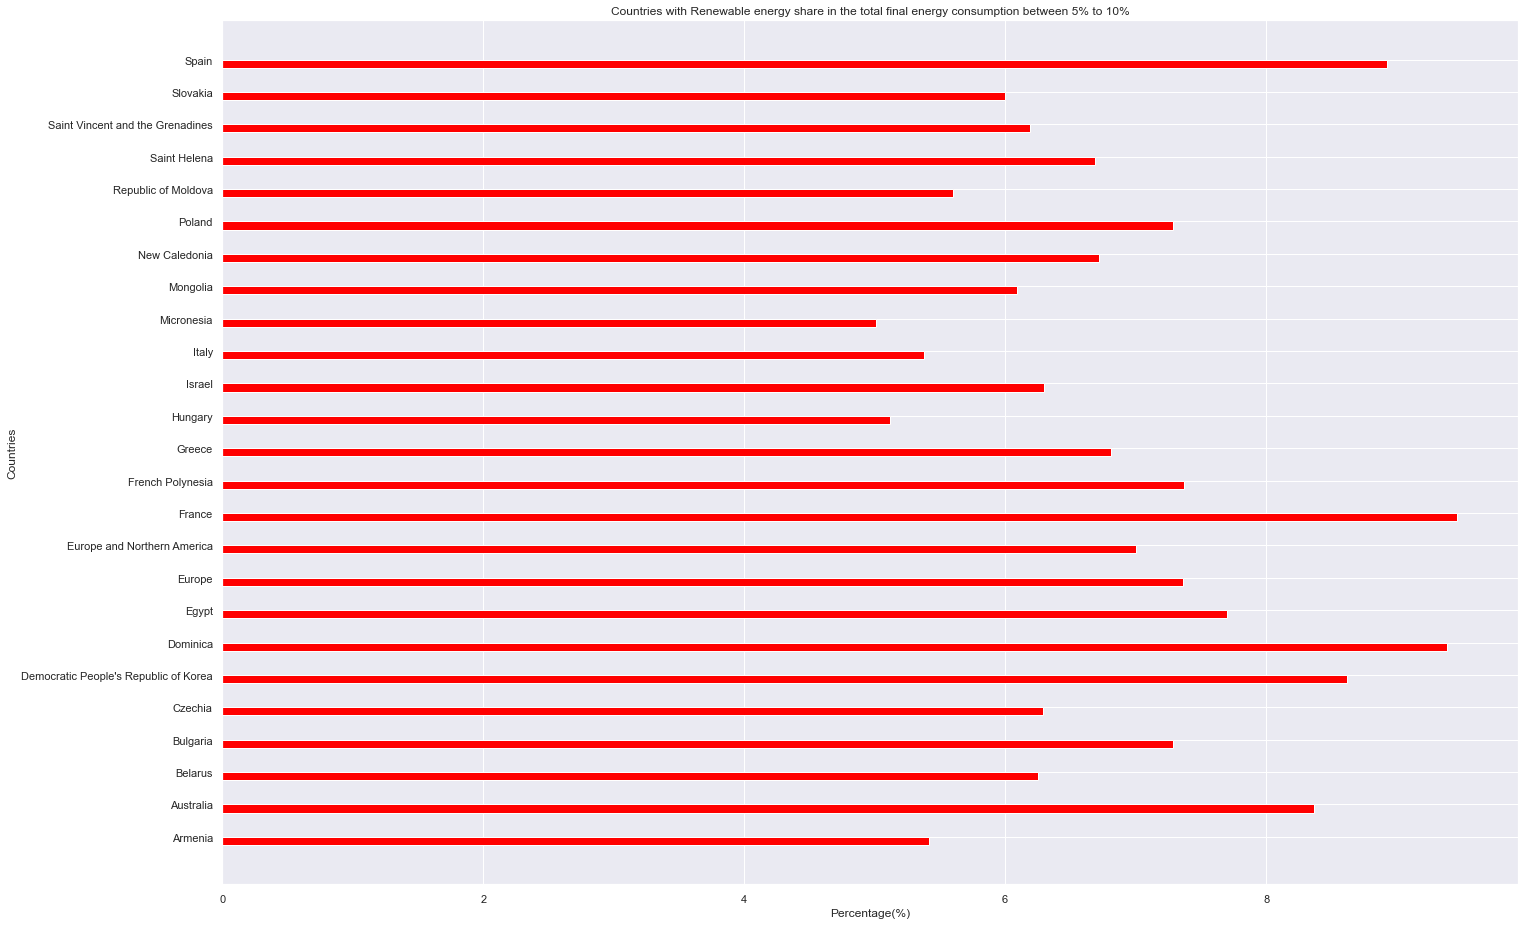

In [63]:
x = ell['GeoAreaName']
y = ell['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 5% to 10%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()

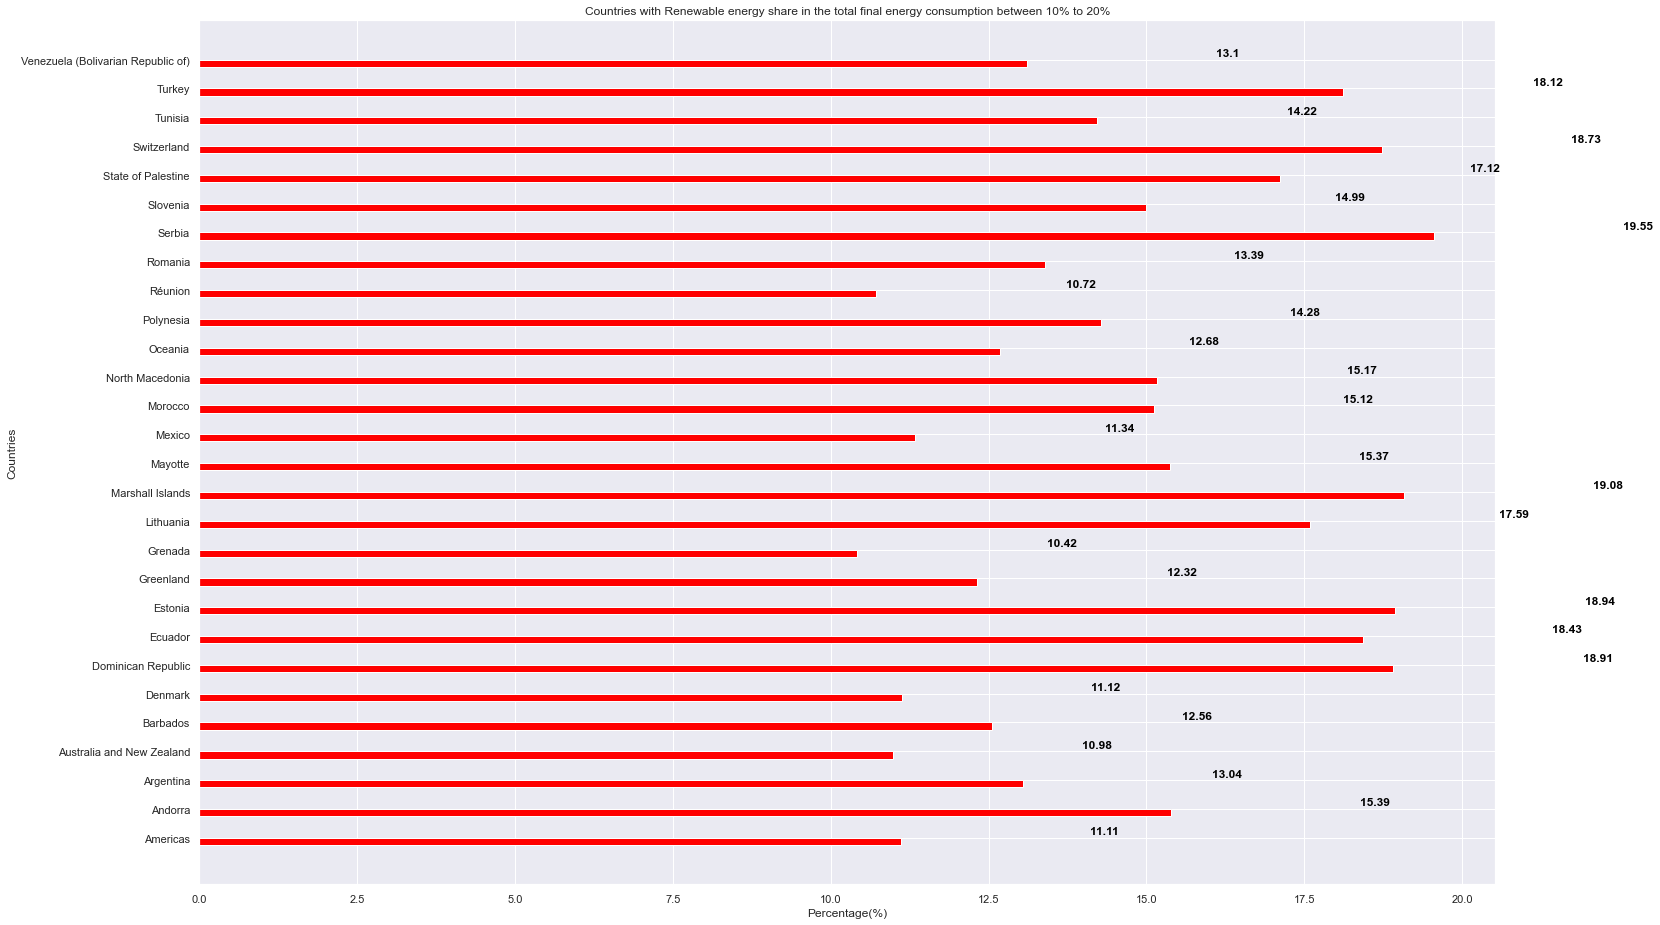

In [64]:
x = el1['GeoAreaName']
y = el1['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 10% to 20%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

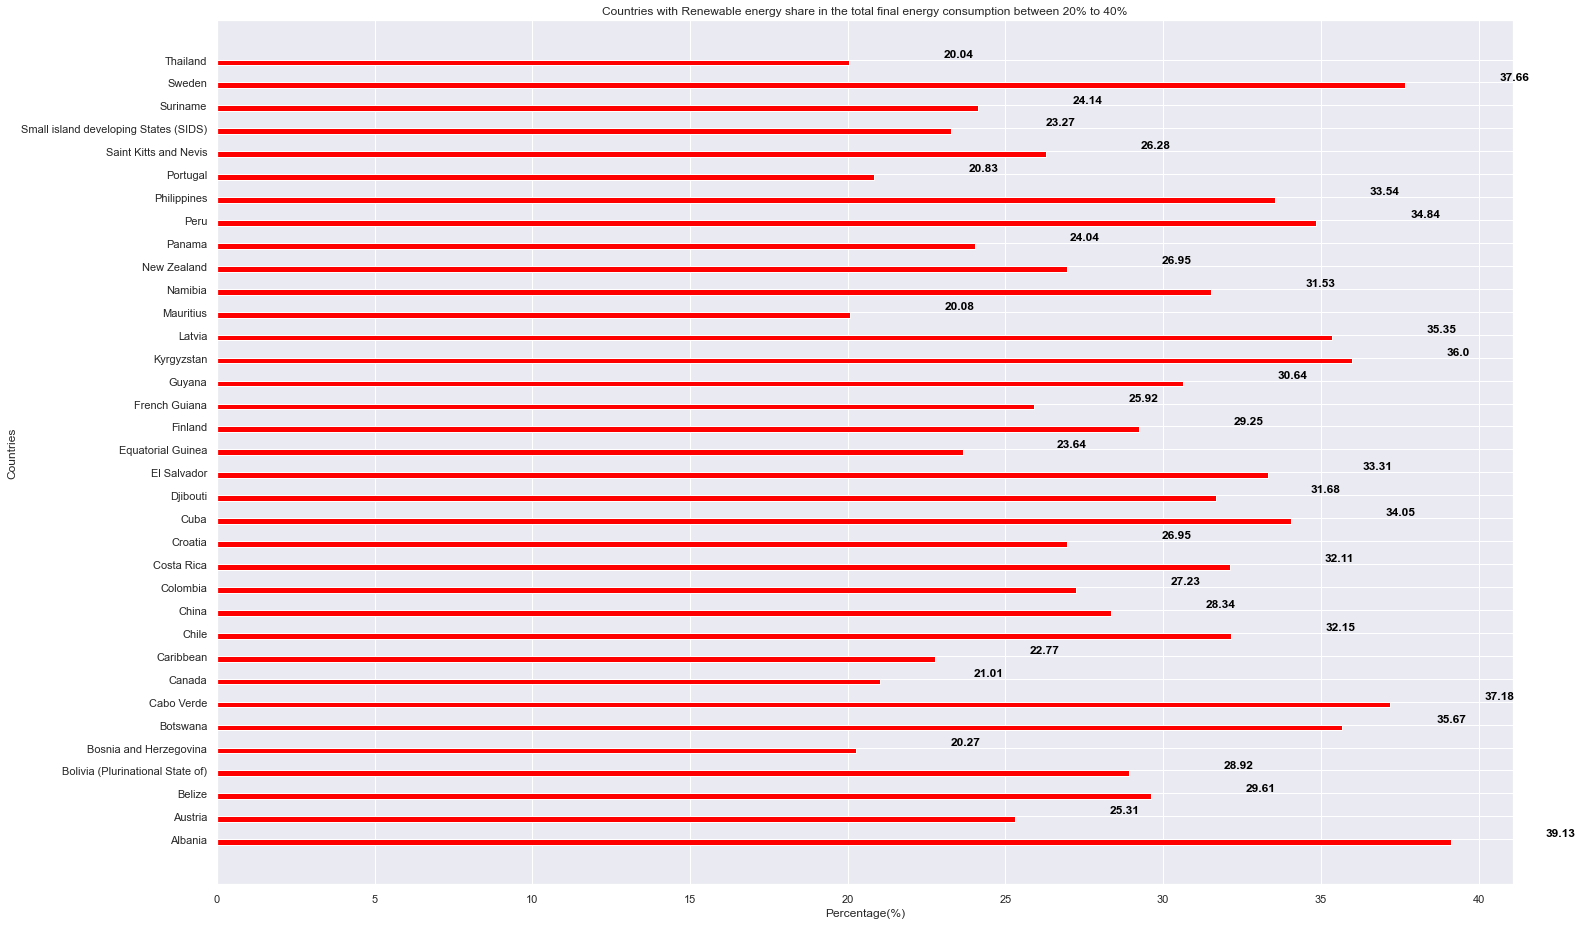

In [65]:
x = el2['GeoAreaName']
y = el2['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 20% to 40%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

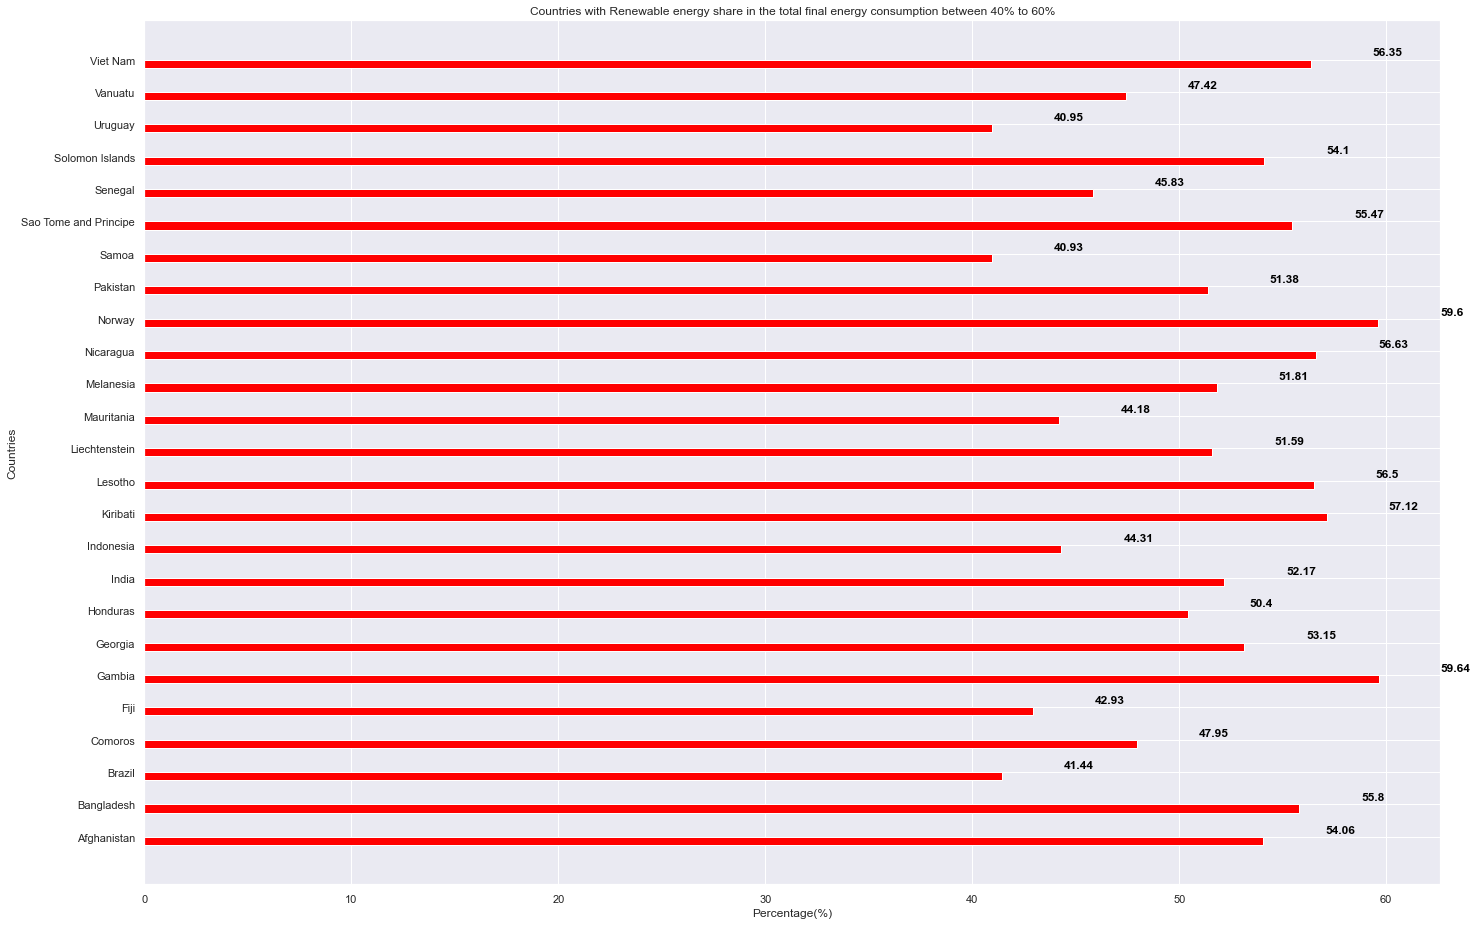

In [66]:
x = el3['GeoAreaName']
y = el3['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 40% to 60%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

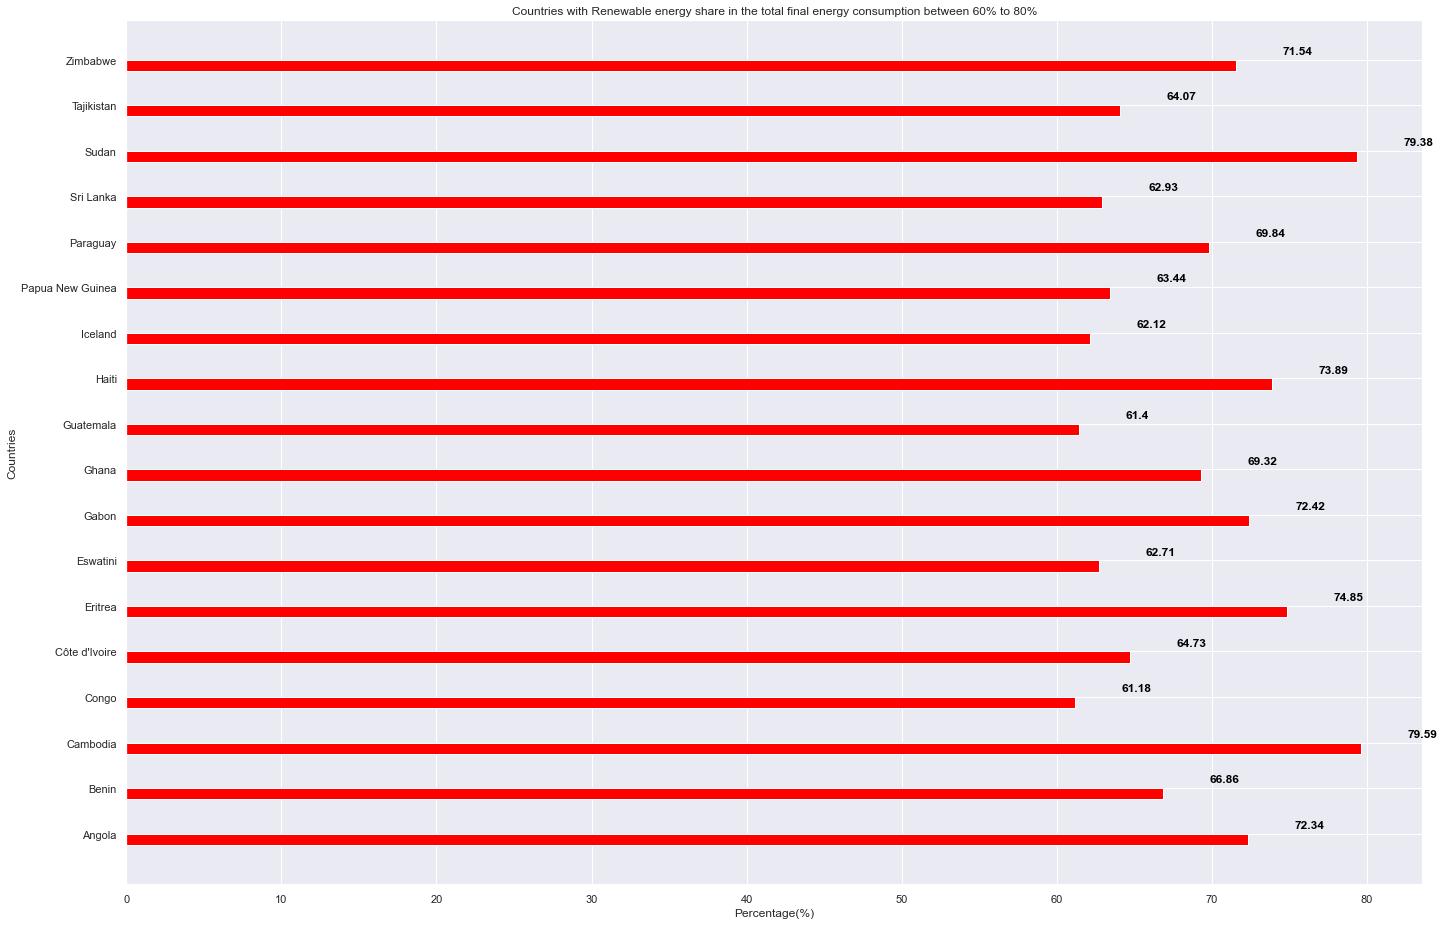

In [67]:
x = el4['GeoAreaName']
y = el4['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 60% to 80%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

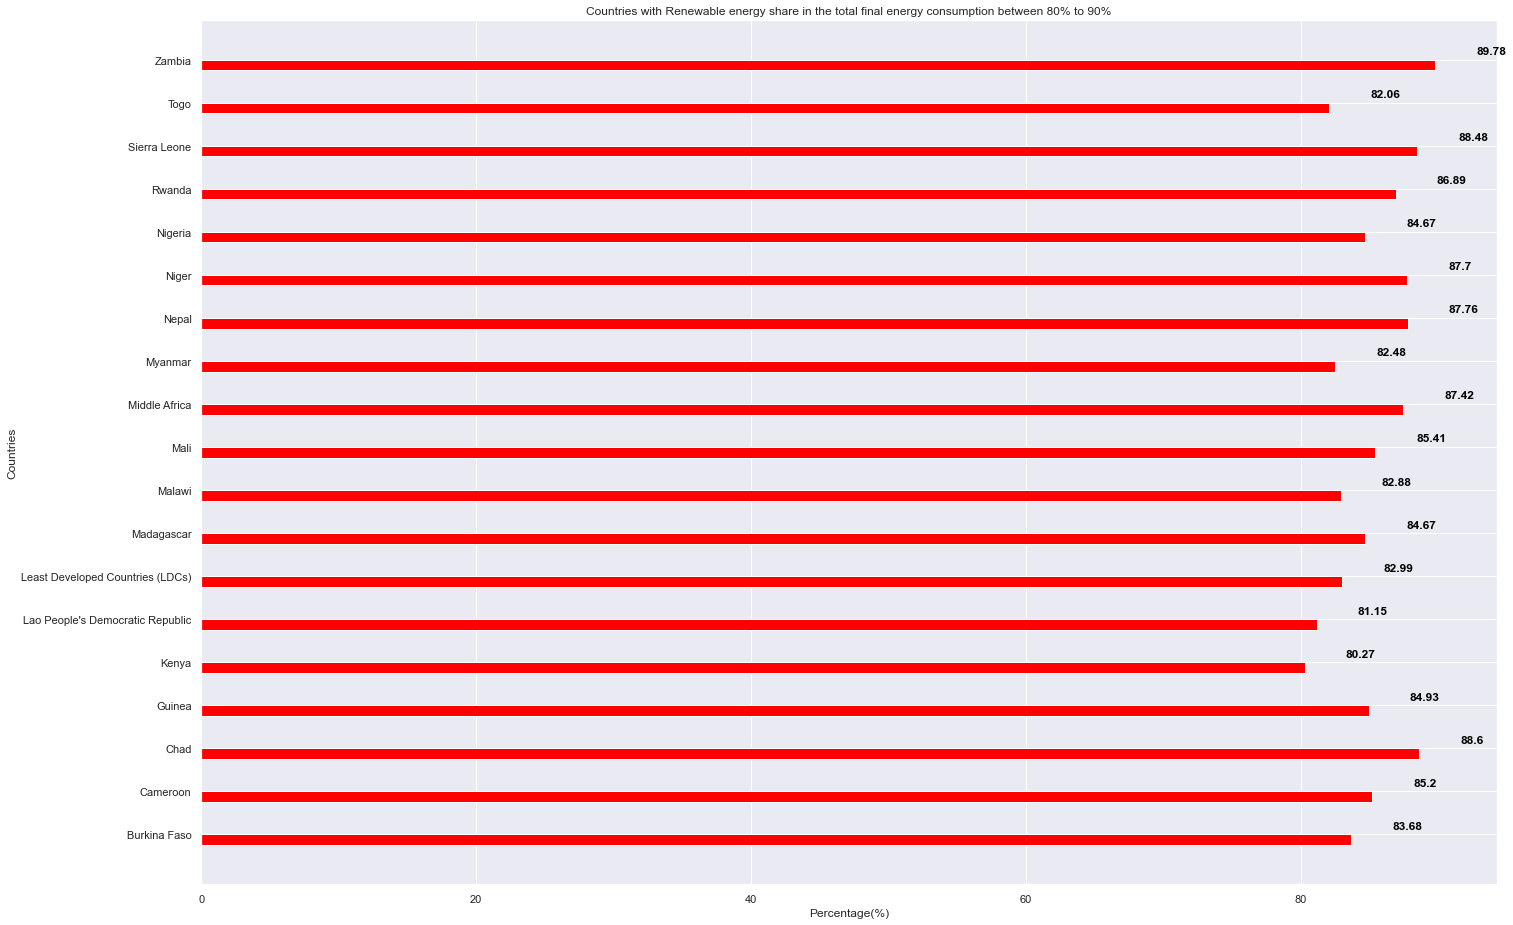

In [68]:
x = el5['GeoAreaName']
y = el5['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 80% to 90%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

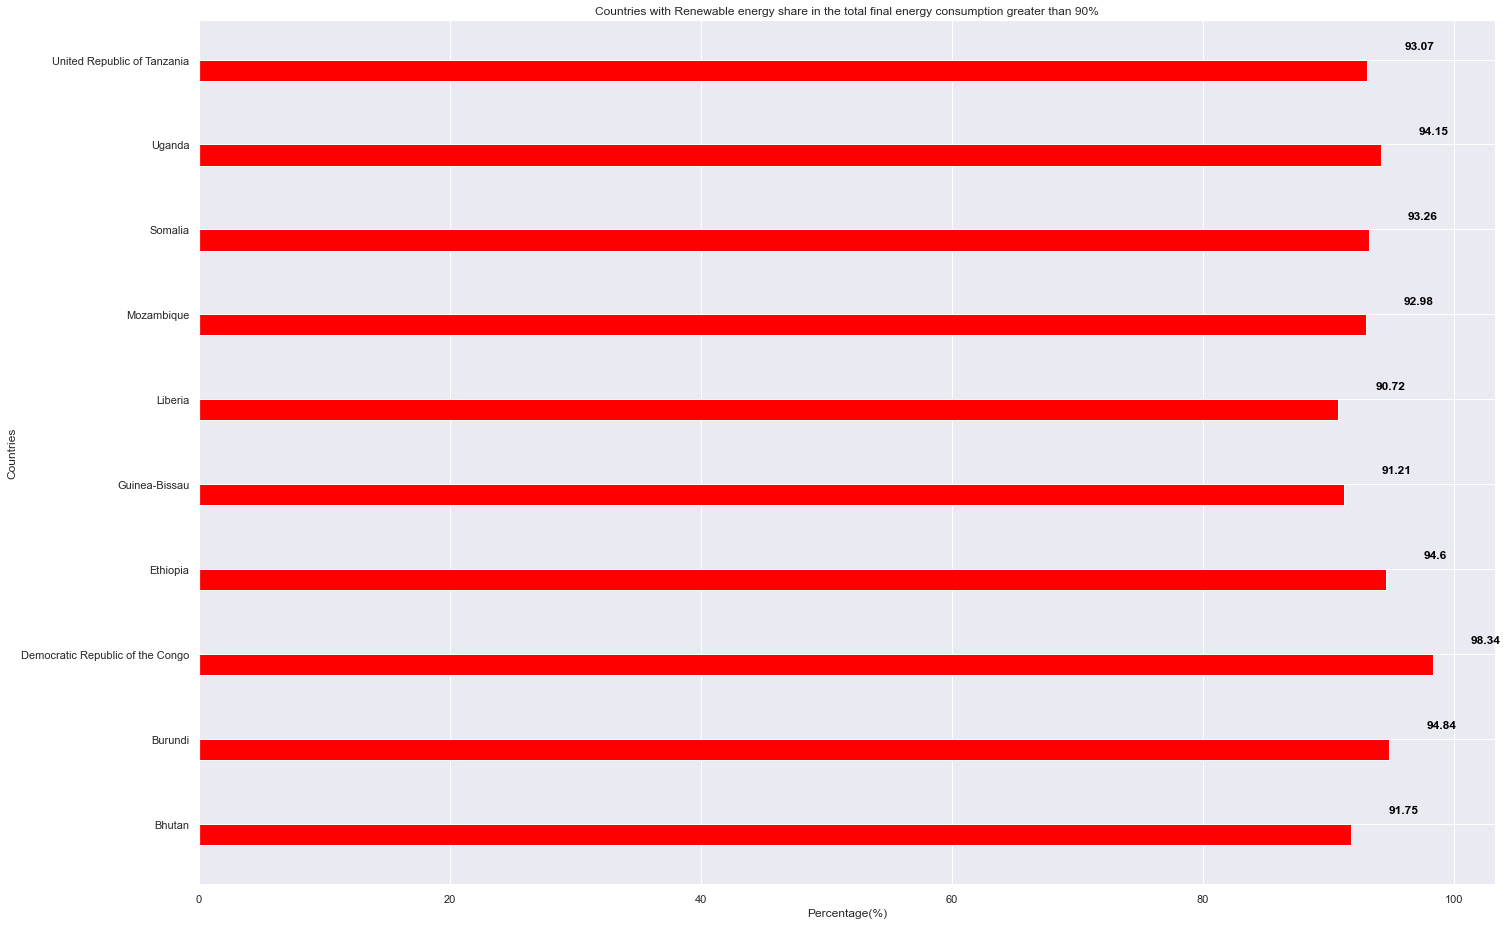

In [69]:
x = el6['GeoAreaName']
y = el6['2001']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption greater than 90%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

In [70]:
l=[]
trace0= go.Scatter(
        y= data['2001'],
        mode= 'markers',
        name='Percentage (%)',
        marker= dict(size= data['2001'].values,
                    line= dict(width=1),
                    color= data['2001'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= data['GeoAreaName'].values) # The hover text goes here... 
l.append(trace0);

layout= go.Layout(
    title= 'Scatter plot of Countries with Renewable energy share in the total final energy consumption (%) in 2001',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False,
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

# **Graphs For Year 2017**

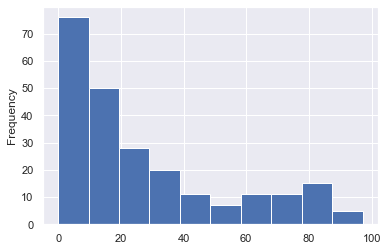

In [71]:
data['2017'].plot.hist(bins=10)

In [72]:
em=data.loc[(data['2017']<5)&(data['2017']>0)].drop(columns=['2001'])
eml=data.loc[(data['2017']<10)&(data['2017']>=5)].drop(columns=['2001'])
em1=data.loc[(data['2017']>=10)&(data['2017']<20)].drop(columns=['2001'])
em2=data.loc[(data['2017']>=20)&(data['2017']<40)].drop(columns=['2001'])
em3=data.loc[(data['2017']>=40)&(data['2017']<60)].drop(columns=['2001'])
em4=data.loc[(data['2017']>=60)&(data['2017']<80)].drop(columns=['2001'])
em5=data.loc[(data['2017']>=80)].drop(columns=['2001'])

Text(0, 0.5, 'Countries')

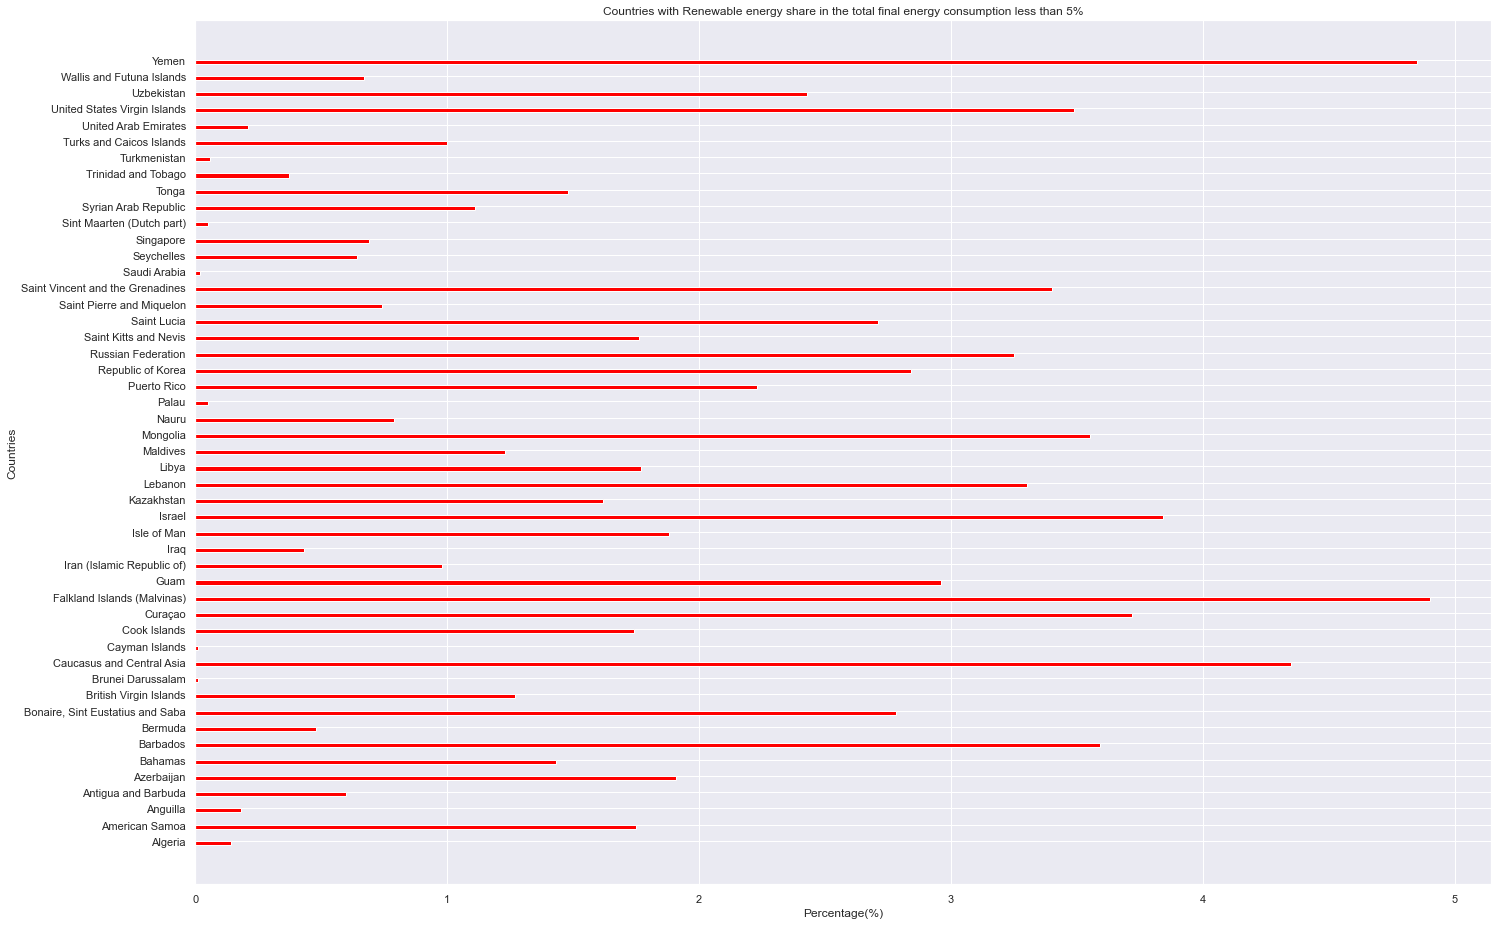

In [73]:
x = em['GeoAreaName']
y = em['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption less than 5%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()


Text(0, 0.5, 'Countries')

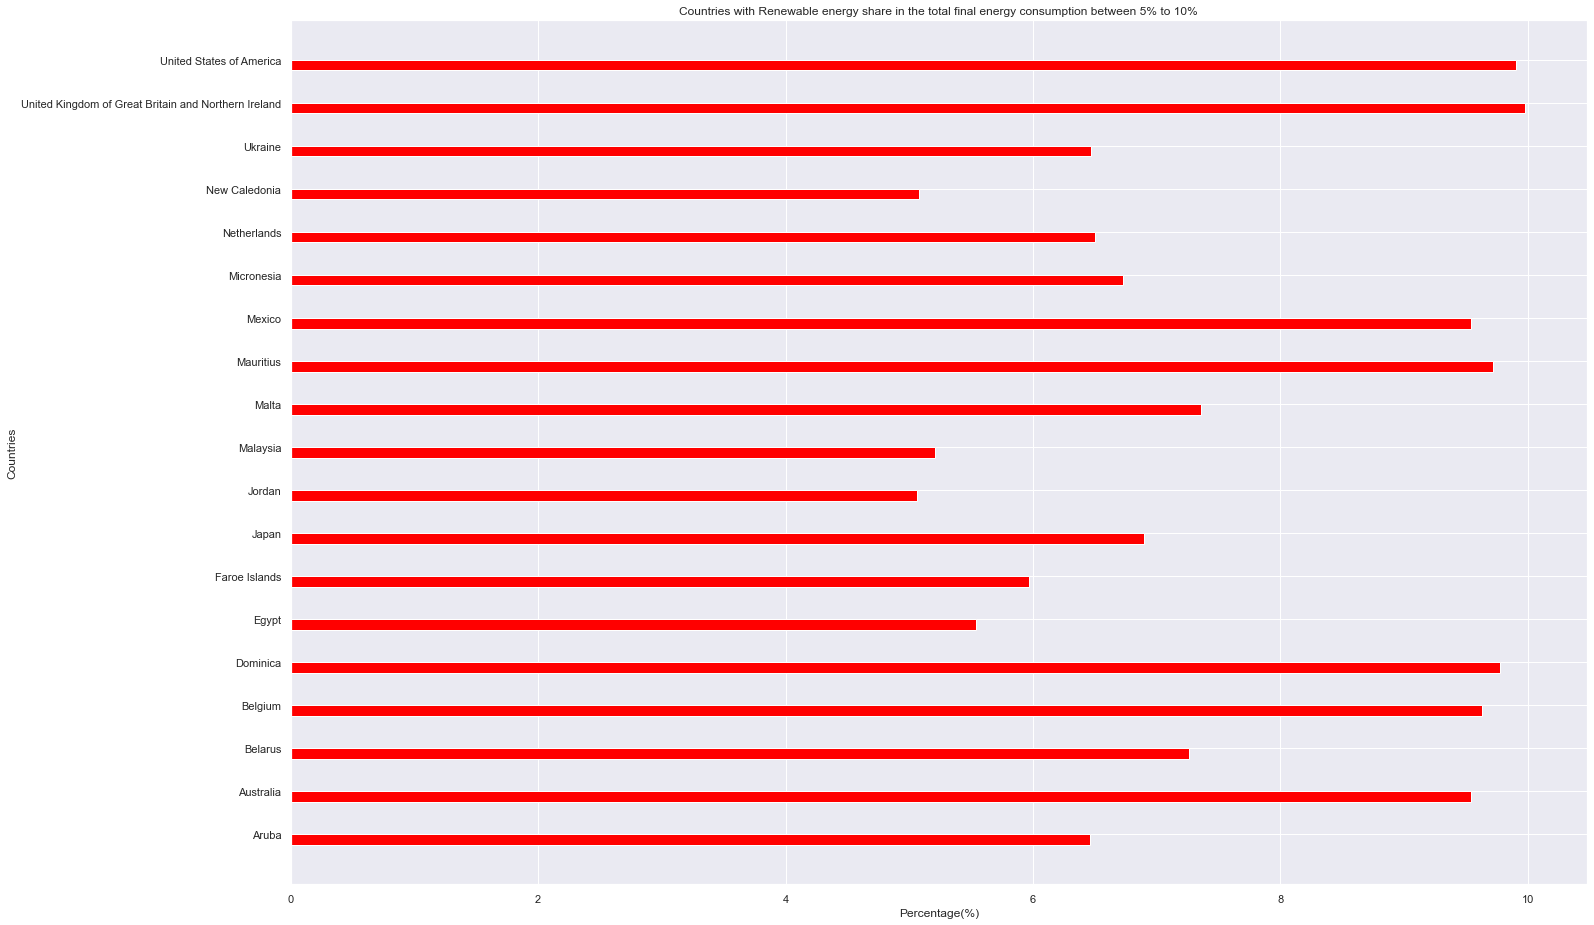

In [74]:
x = eml['GeoAreaName']
y = eml['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 5% to 10%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()

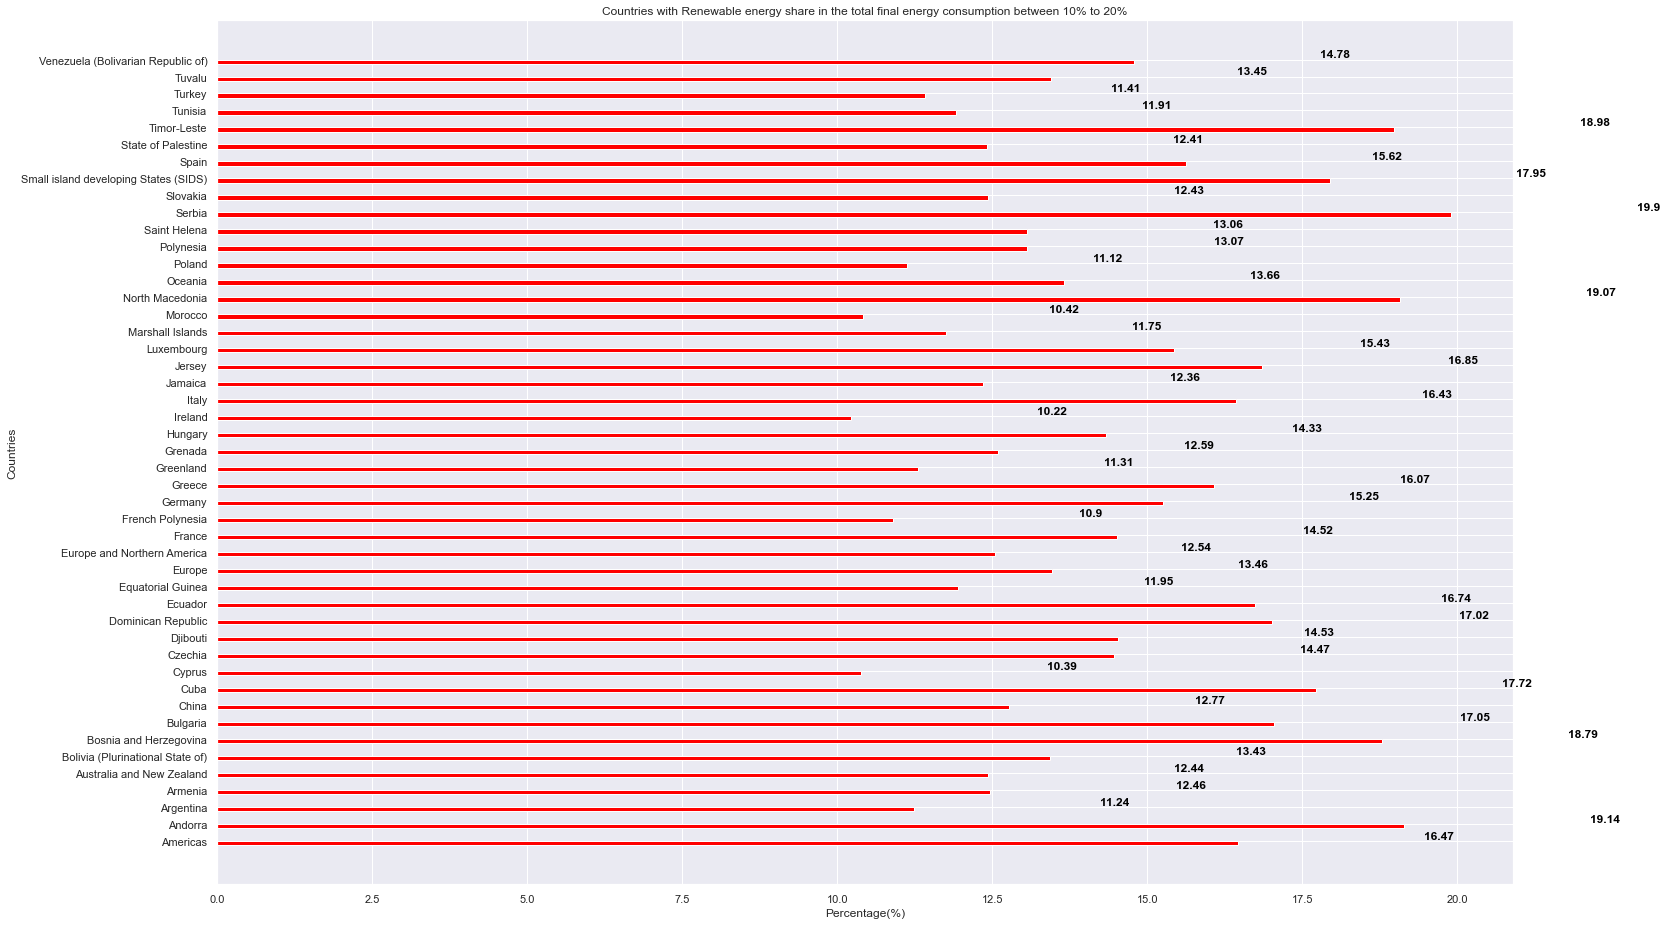

In [75]:
x = em1['GeoAreaName']
y = em1['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 10% to 20%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

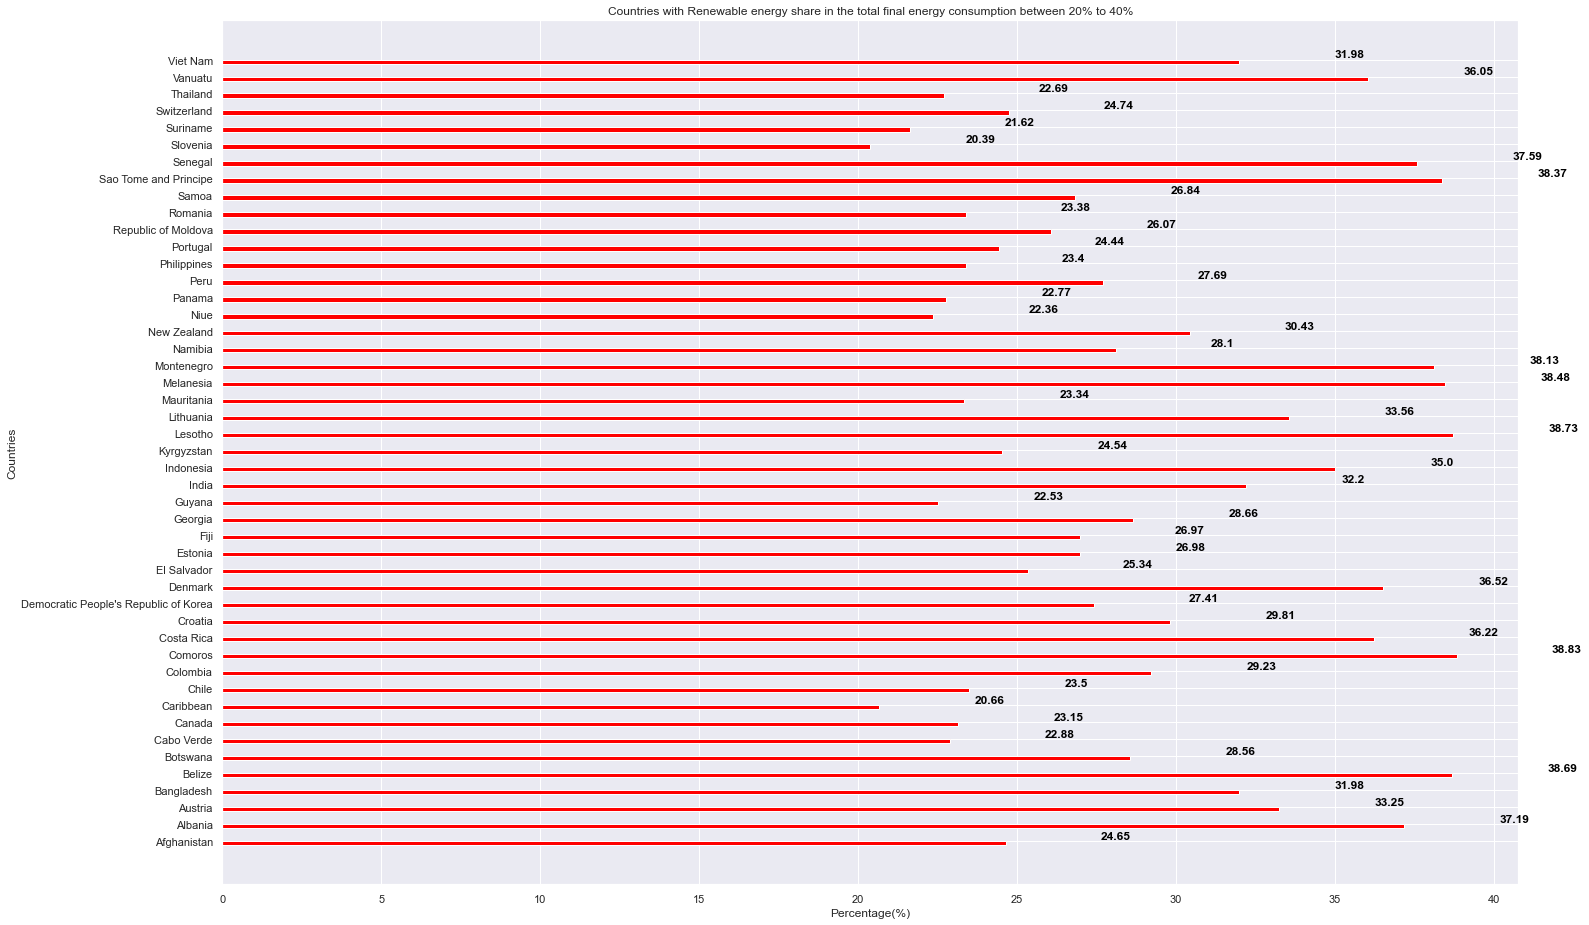

In [76]:
x = em2['GeoAreaName']
y = em2['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 20% to 40%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

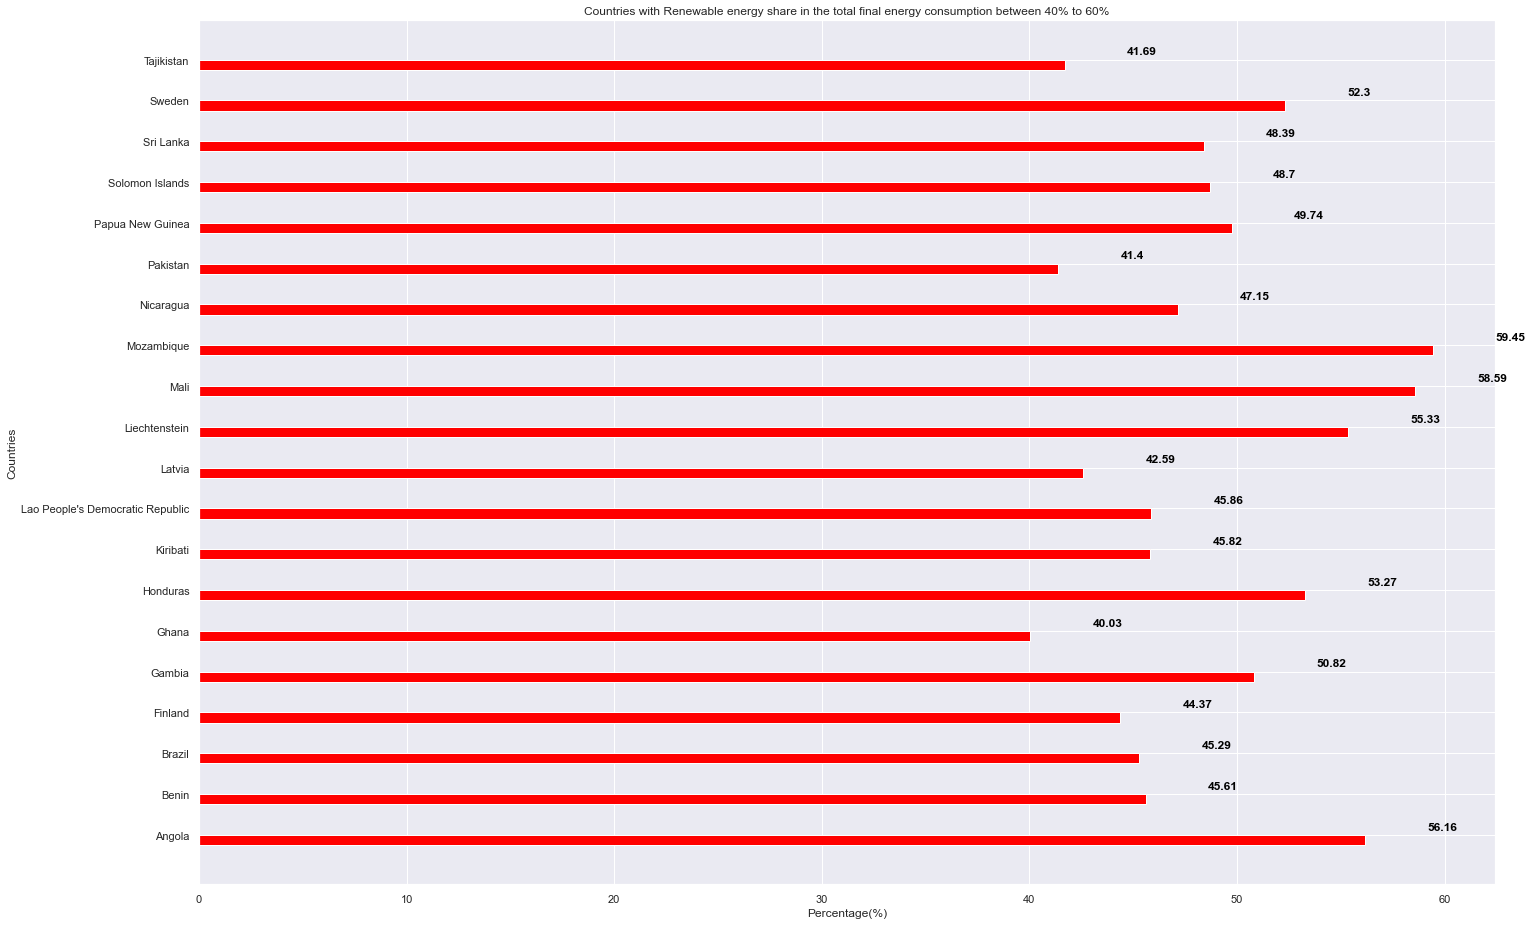

In [77]:
x = em3['GeoAreaName']
y = em3['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 40% to 60%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

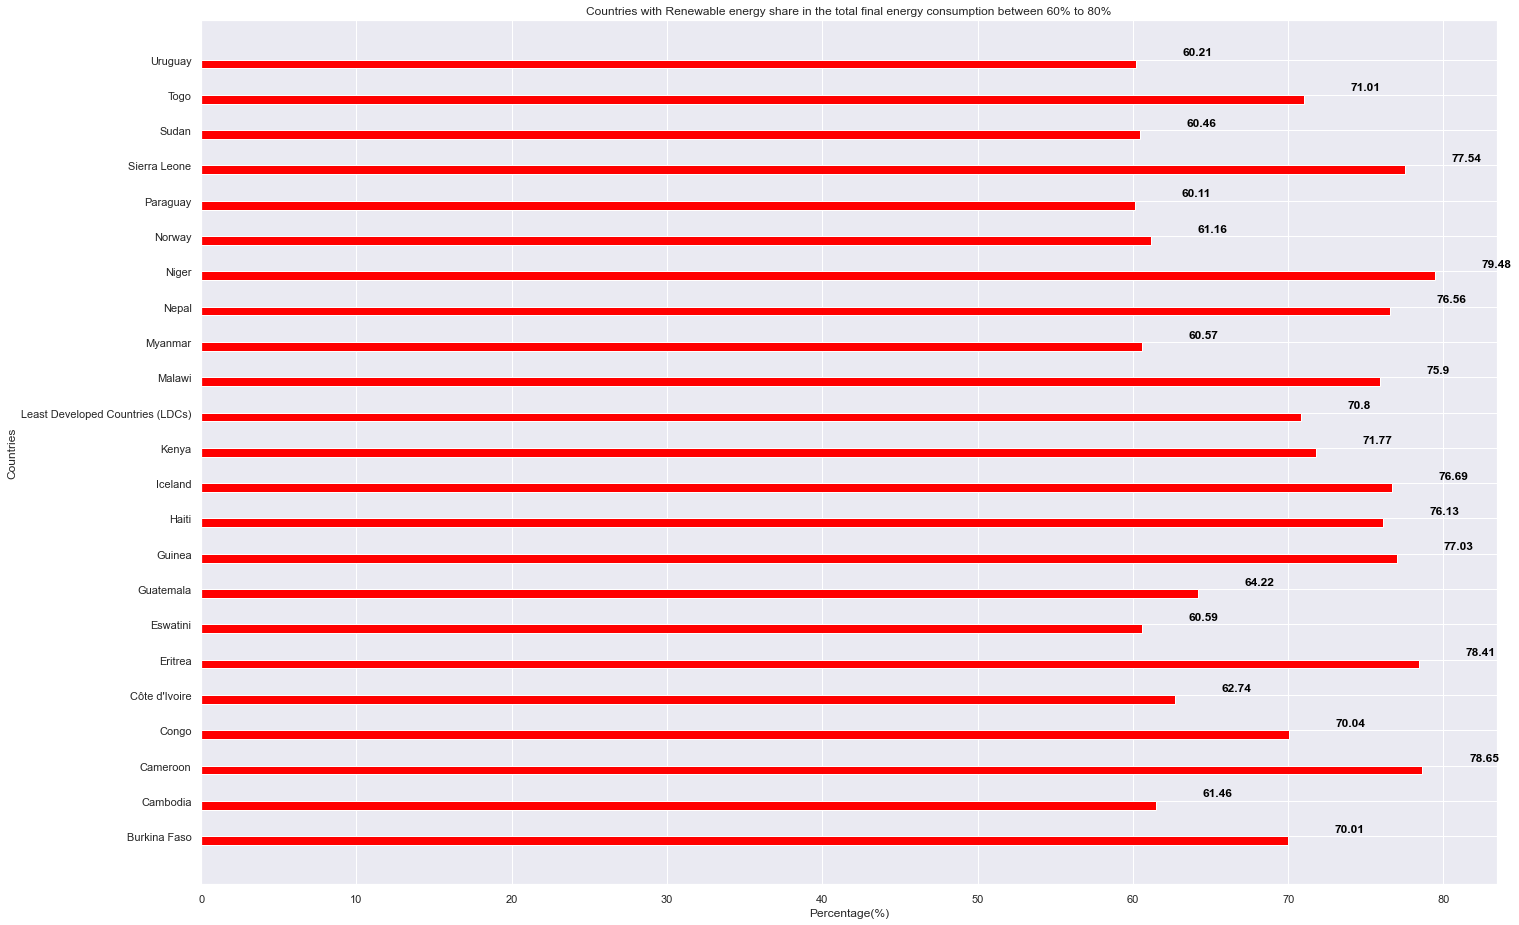

In [78]:
x = em4['GeoAreaName']
y = em4['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 60% to 80%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

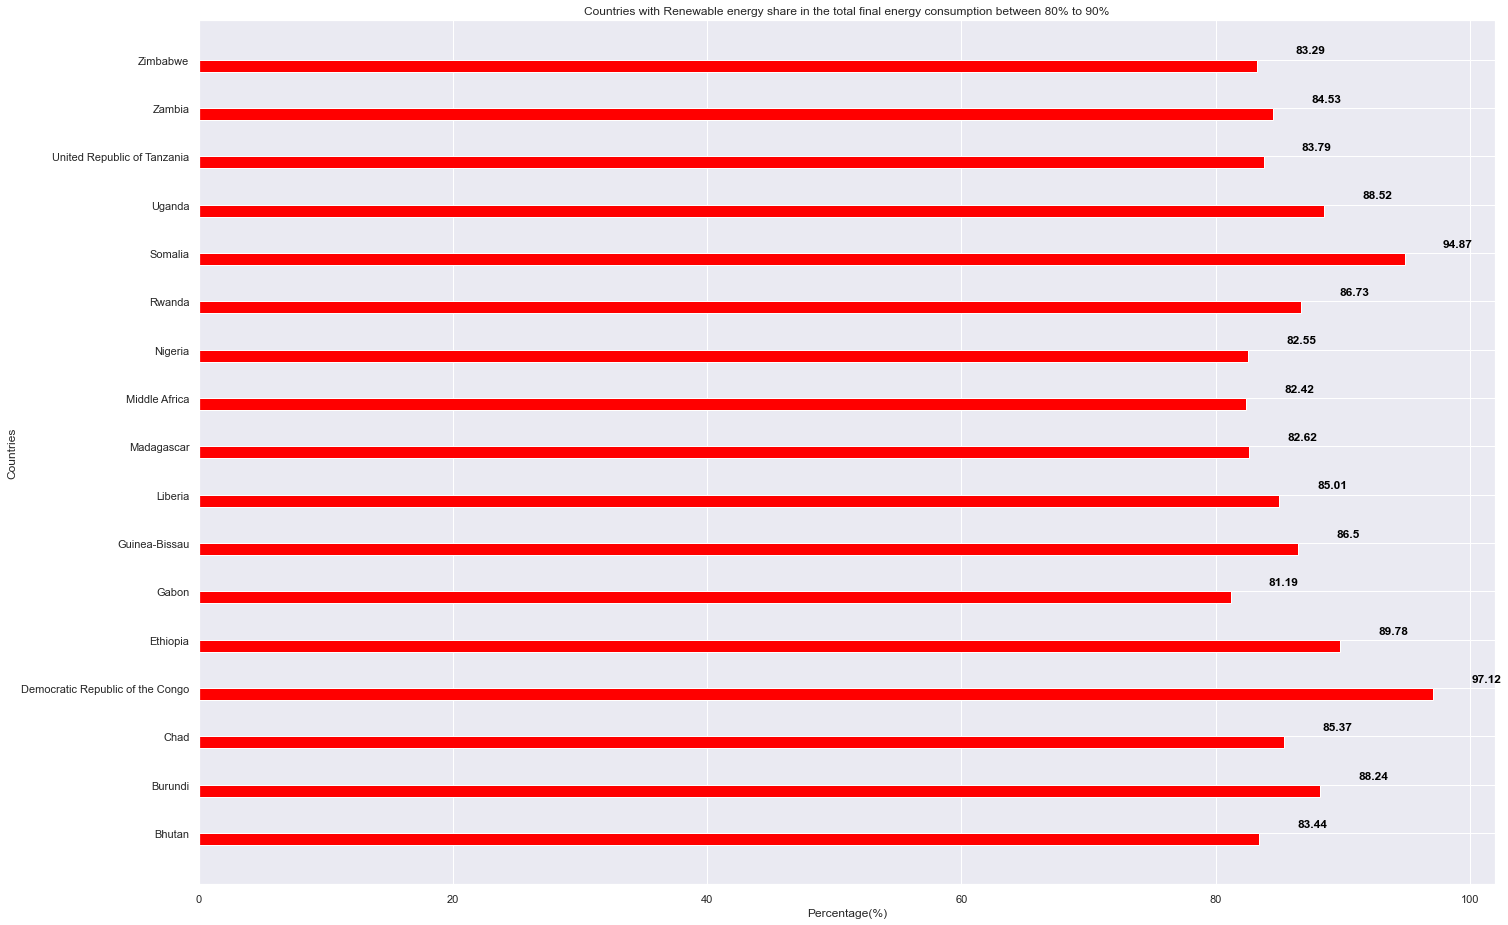

In [79]:
x = em5['GeoAreaName']
y = em5['2017']
fig= plt.figure()
ax = fig.add_axes([3,3,3,3])
width = 0.25 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="red")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Countries with Renewable energy share in the total final energy consumption between 80% to 90%')
plt.xlabel('Percentage(%)')
plt.ylabel('Countries')    
#plt.show()
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

In [80]:
l=[]
trace0= go.Scatter(
        y= data['2017'],
        mode= 'markers',
        name='Percentage (%)',
        marker= dict(size= data['2001'].values,
                    line= dict(width=1),
                    color= data['2001'].values,
                    opacity= 0.7,
                    colorscale='Portland',
                    showscale=True),
        text= data['GeoAreaName'].values) # The hover text goes here... 
l.append(trace0);

layout= go.Layout(
    title= 'Scatter plot of Countries with Renewable energy share in the total final energy consumption (%) in 2017',
    hovermode= 'closest',
    xaxis= dict(
#        title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage (%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False,
)
fig= go.Figure(data=l, layout=layout)
py.iplot(fig)

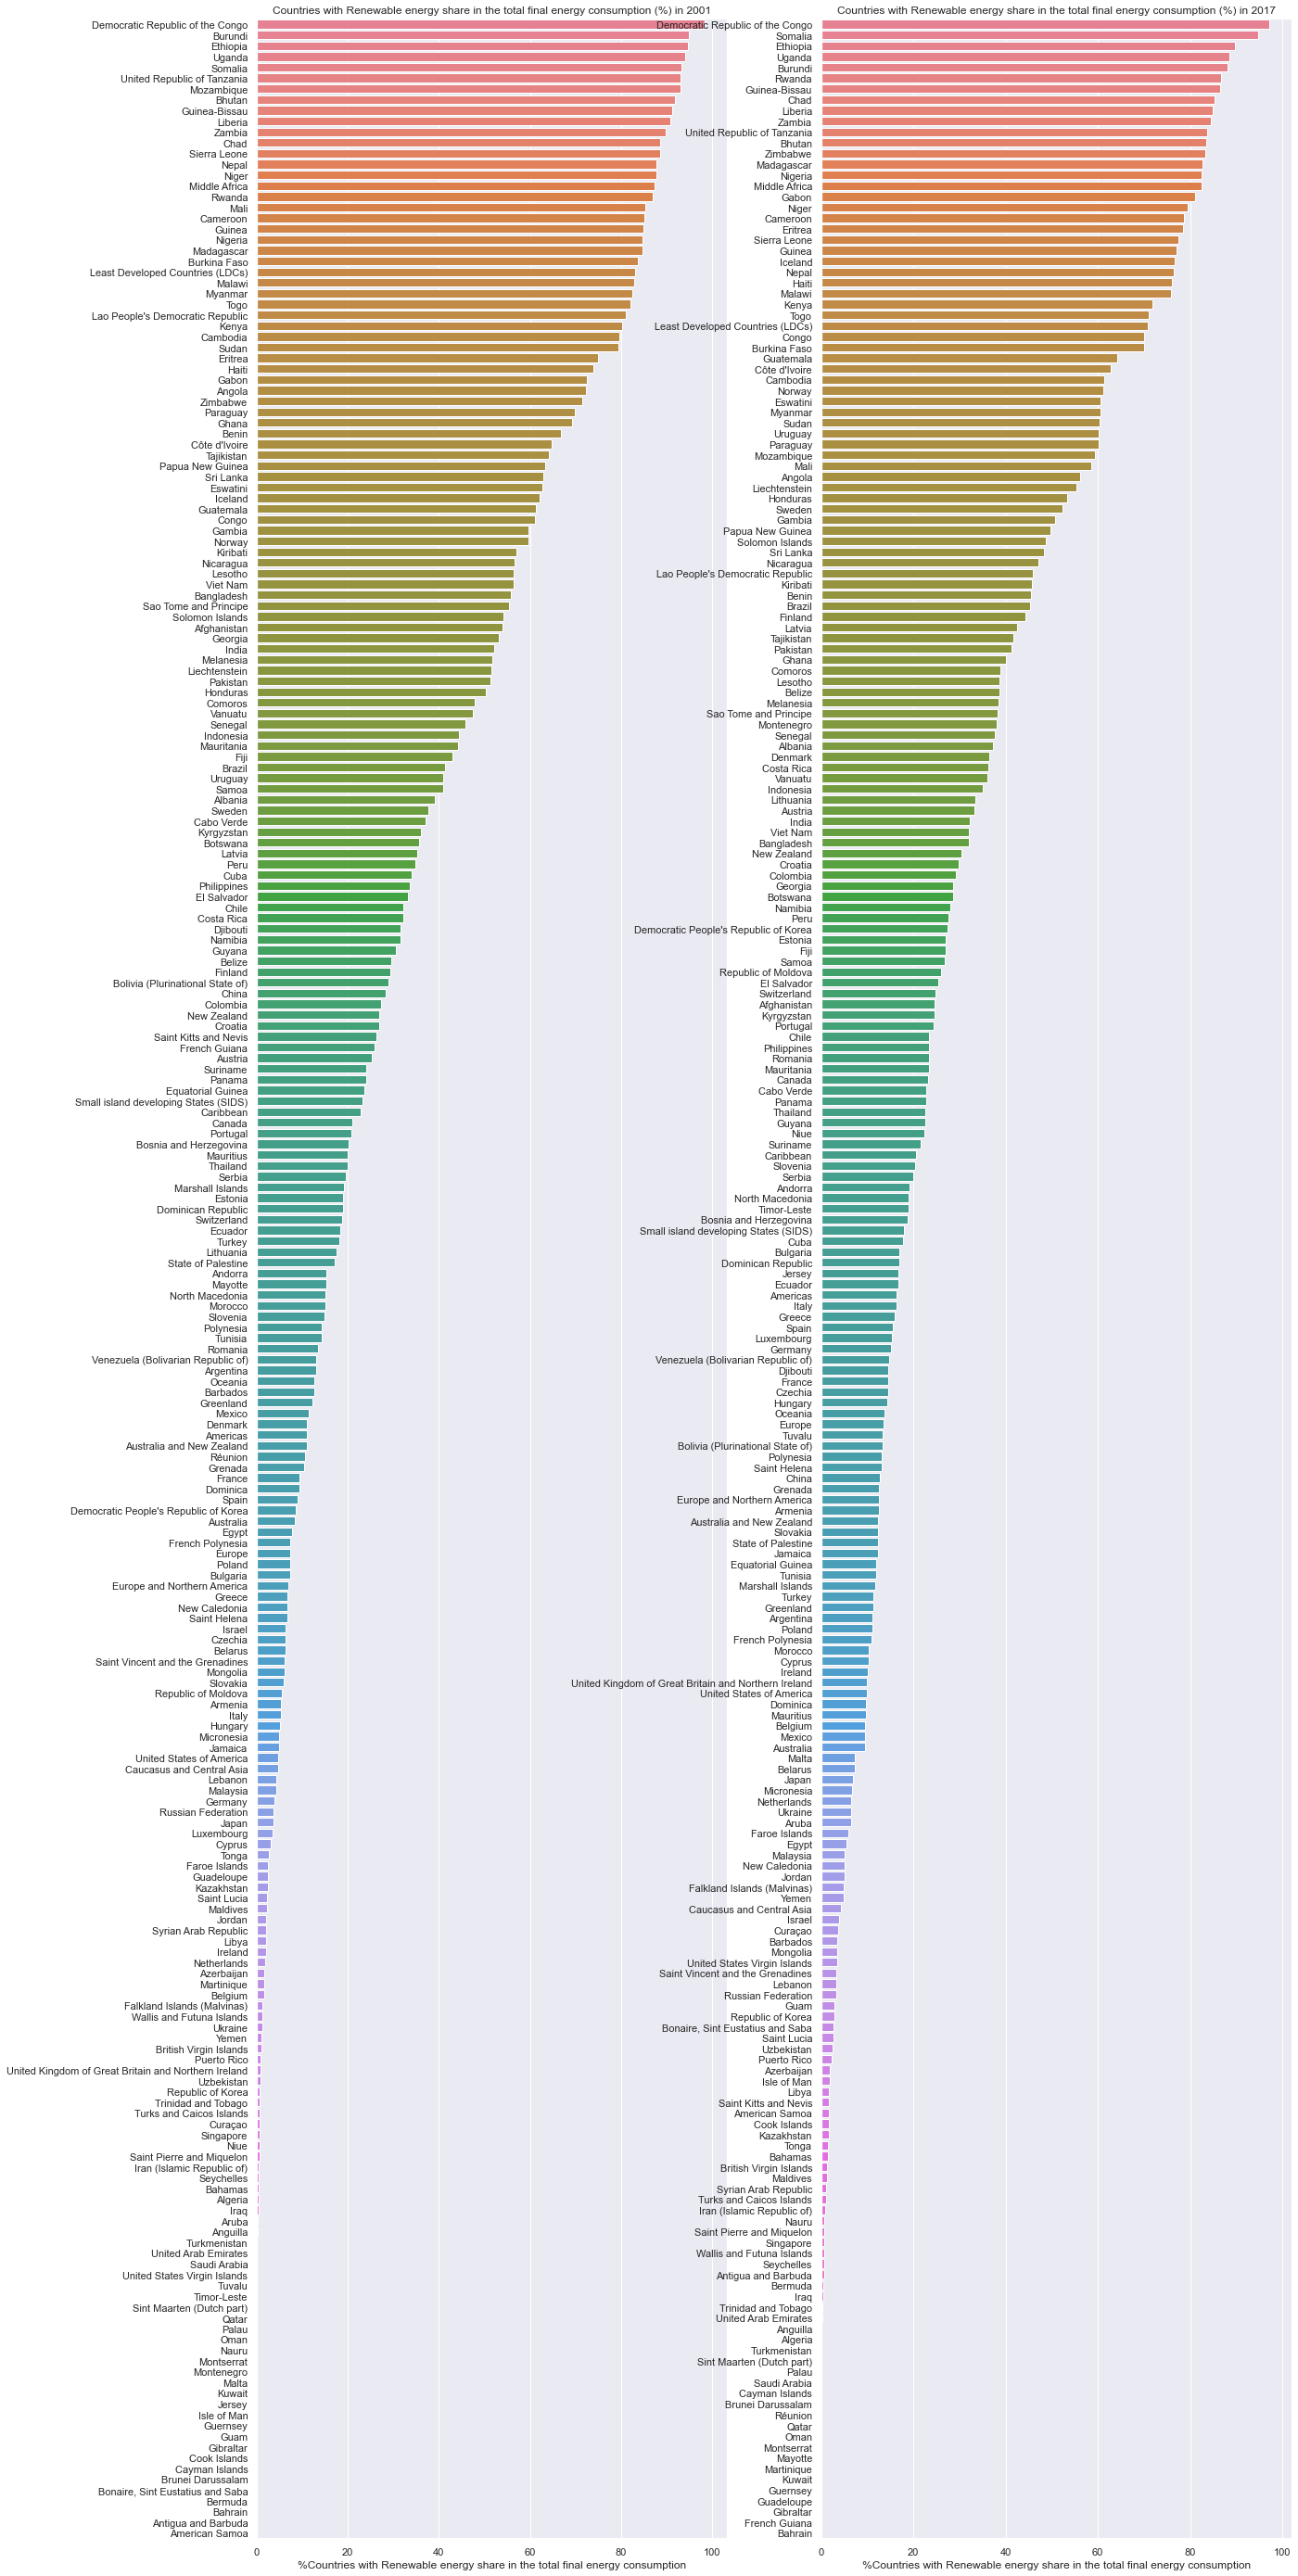

In [85]:
# Tried with Plotly now going with seaborn
twoyearchange1_bar, countries_bar1 = (list(x) for x in zip(*sorted(zip(data['2001'], data['GeoAreaName']), 
                                                             reverse = True)))

twoyearchange2_bar, countries_bar2 = (list(x) for x in zip(*sorted(zip(data['2017'], data['GeoAreaName']), 
                                                             reverse = True)))

# Another direct way of sorting according to values is creating distinct sorted dataframes as in below commented ways and then
# passing their values directly as in below mentioned code to achieve the same effect as by above mentioned method.

# df_country_sorted=df_country.sort(columns='2014-2012 change',ascending=False)
# df_country_sorted.head()


sns.set(font_scale=1) 
fig, axes = plt.subplots(1,2,figsize=(20, 50))
colorspal = sns.color_palette('husl', len(data['2001']))
sns.barplot(twoyearchange1_bar, countries_bar1, palette = colorspal,ax=axes[0])
sns.barplot(twoyearchange2_bar, countries_bar2, palette = colorspal,ax=axes[1])
axes[0].set(xlabel='%Countries with Renewable energy share in the total final energy consumption', title='Countries with Renewable energy share in the total final energy consumption (%) in 2001')
axes[1].set(xlabel='%Countries with Renewable energy share in the total final energy consumption', title='Countries with Renewable energy share in the total final energy consumption (%) in 2017')
fig.savefig('output.png')

In [86]:
x_data = ['2001','2017']

y0 = data['2001']
y1 = data['2017']


y_data = [y0,y1]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)']

traces = []

for xd, yd, color in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            whiskerwidth=0.2,
            fillcolor=color,
            marker=dict(
                size=2,
            ),
            boxmean=True,    
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Data',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Percentage (%)',
        autorange=True,
        showgrid=True,
        zeroline=False,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
#        zerolinecolor='rgb(255, 255, 255)',
#        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)